# Тест на скорочтение
Одной из приоритетных задач нашей лаборатории является разработка методов оценки и улучшения функционального состояния человека. В качестве одного из разработанных экспериментов мы изучали влияние специального обучения на то, как человек воспринимает текст на слух в ускоренном режиме. Оценка качества восприятия человеком информации основывалась на тесте, в котором необходимо было ответить на вопросы по прослушанному тексту. Каждое задание состояло из пяти вопросов и, соответственно, человек мог набрать от нуля до пяти баллов за каждое задание.

Вам предстоит проанализировать зависимости результатов теста от сложности заданий и обучения.

### Описание данных

В таблице speedreading_data приведены данные по двум группам людей, проходившим данный тест:

- Задания 1-5: до обучения, сложность Y1.
- Задания 6-10: после обучения, сложность Y2.
- Задания 11-15: без обучения, сложность Y3.
- Задания 16-20: без обучения, сложность Y4.

### Вопросы и задания

1. В предположении Y1 = Y2, влияет ли обучение на качество восприятия информации?
2. В предположении Y3 < Y4, влияет ли сложность задания на качество восприятия информации?
3. Допустим, что по итогам анализа процедуры проведения теста выяснилось, что Y1 = Y3, Y2 = Y4, Y1 < Y2. Как можно (и можно ли вообще) использовать результаты второй группы (I-P) для корректировки результатов первой группы (A-J)? Обосновать метод корректировки и провести переоценку результатов первого теста. 

### Ключевые слова

#scipy #stattest


In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt

In [2]:
data_speedreading = pd.read_csv("speedreading_data.csv")
data_speedreading_2 = pd.read_csv("speedreading_data_2.csv")

In [3]:
#задания Y1 и Y2
data_speedreading

,Unnamed: 0,До обучения,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,После обучения,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,NaN,Задание 1,Задание 2,Задание 3,Задание 4,Задание 5,Задание 6,Задание 7,Задание 8,Задание 9,Задание 10
1,A,4,2,4,4,2,3,1,1,3,2
2,B,5,4,5,3,2,4,2,1,2,2
3,C,5,3,3,2,1,5,4,1,3,3
4,D,5,4,4,2,4,5,4,2,3,2
5,E,5,5,4,3,3,5,3,2,1,1
6,F,5,3,4,1,1,4,5,2,3,2
7,G,5,2,4,3,3,3,3,0,4,3
8,H,5,4,4,3,2,4,2,2,3,3
9,I,5,2,2,2,2,4,3,3,4,3


In [4]:
data_y1 = data_speedreading.iloc[1:11, 0:6]
data_y1.set_axis(['test subject','z1_y1','z2_y1','z3_y1','z4_y1','z5_y1'],axis="columns",inplace=True)
data_y1[['z1_y1','z2_y1','z3_y1','z4_y1','z5_y1']]=data_y1[['z1_y1','z2_y1','z3_y1','z4_y1','z5_y1']].astype('int')
data_y1['sum_y1'] = data_y1[['z1_y1','z2_y1','z3_y1','z4_y1','z5_y1']].sum(axis=1)
data_y1['mean_y1'] = data_y1[['z1_y1','z2_y1','z3_y1','z4_y1','z5_y1']].mean(axis=1)

In [5]:
data_y1

,test subject,z1_y1,z2_y1,z3_y1,z4_y1,z5_y1,sum_y1,mean_y1
1,A,4,2,4,4,2,16,3.2
2,B,5,4,5,3,2,19,3.8
3,C,5,3,3,2,1,14,2.8
4,D,5,4,4,2,4,19,3.8
5,E,5,5,4,3,3,20,4.0
6,F,5,3,4,1,1,14,2.8
7,G,5,2,4,3,3,17,3.4
8,H,5,4,4,3,2,18,3.6
9,I,5,2,2,2,2,13,2.6
10,J,5,3,2,4,2,16,3.2


In [6]:
print('Средний балл группы 1 сложность Y1 =',np.round(data_y1['mean_y1'].mean(),2))

Средний балл группы 1 сложность Y1 = 3.32


In [7]:
data_y2 = data_speedreading.iloc[1:11, [0,6,7,8,9,10]]
data_y2.set_axis(['test subject','z6_y2','z7_y2','z8_y2','z9_y2','z10_y2'],axis="columns",inplace=True)
data_y2[['z6_y2','z7_y2','z8_y2','z9_y2','z10_y2']]=data_y2[['z6_y2','z7_y2','z8_y2','z9_y2','z10_y2']].astype('int')
data_y2['sum_y2'] = data_y2[['z6_y2','z7_y2','z8_y2','z9_y2','z10_y2']].sum(axis=1)
data_y2['mean_y2'] = data_y2[['z6_y2','z7_y2','z8_y2','z9_y2','z10_y2']].mean(axis=1)

In [8]:
data_y2

,test subject,z6_y2,z7_y2,z8_y2,z9_y2,z10_y2,sum_y2,mean_y2
1,A,3,1,1,3,2,10,2.0
2,B,4,2,1,2,2,11,2.2
3,C,5,4,1,3,3,16,3.2
4,D,5,4,2,3,2,16,3.2
5,E,5,3,2,1,1,12,2.4
6,F,4,5,2,3,2,16,3.2
7,G,3,3,0,4,3,13,2.6
8,H,4,2,2,3,3,14,2.8
9,I,4,3,3,4,3,17,3.4
10,J,3,4,4,3,2,16,3.2


In [9]:
print('Средний балл группы 1 сложность Y2 =',np.round(data_y2['mean_y2'].mean(),2))

Средний балл группы 1 сложность Y2 = 2.82


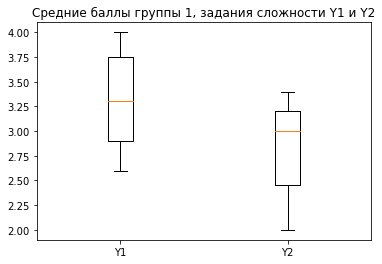

In [10]:
# Визуализируем
fig1, ax1 = plt.subplots()
ax1.set_title('Средние баллы группы 1, задания сложности Y1 и Y2')
ax1.boxplot([data_y1['mean_y1'],data_y2['mean_y2']],labels=['Y1','Y2'])
plt.show()

<AxesSubplot:title={'center':'Средние баллы группы 1, задания сложности Y1 и Y2'}>

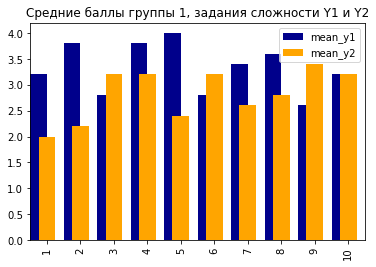

In [11]:
# Визуализируем
ax3 = data_y1['mean_y1'].plot(kind='bar', color='darkblue', y='mean_y1', position=1, legend=True)
data_y2['mean_y2'].plot(title='Средние баллы группы 1, задания сложности Y1 и Y2',kind='bar',position=0.5, color='orange', y='mean_y2', ax=ax3, legend=True)

In [12]:
data_y1.describe()

,z1_y1,z2_y1,z3_y1,z4_y1,z5_y1,sum_y1,mean_y1
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,4.900000,3.200000,3.600000,2.700000,2.200000,16.600000,3.320000
std,0.316228,1.032796,0.966092,0.948683,0.918937,2.412928,0.482586
min,4.000000,2.000000,2.000000,1.000000,1.000000,13.000000,2.600000
25%,5.000000,2.250000,3.250000,2.000000,2.000000,14.500000,2.900000
50%,5.000000,3.000000,4.000000,3.000000,2.000000,16.500000,3.300000
75%,5.000000,4.000000,4.000000,3.000000,2.750000,18.750000,3.750000
max,5.000000,5.000000,5.000000,4.000000,4.000000,20.000000,4.000000


In [13]:
data_y2.describe()

,z6_y2,z7_y2,z8_y2,z9_y2,z10_y2,sum_y2,mean_y2
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,4.000000,3.100000,1.800000,2.900000,2.300000,14.100000,2.820000
std,0.816497,1.197219,1.135292,0.875595,0.674949,2.469818,0.493964
min,3.000000,1.000000,0.000000,1.000000,1.000000,10.000000,2.000000
25%,3.250000,2.250000,1.000000,3.000000,2.000000,12.250000,2.450000
50%,4.000000,3.000000,2.000000,3.000000,2.000000,15.000000,3.000000
75%,4.750000,4.000000,2.000000,3.000000,3.000000,16.000000,3.200000
max,5.000000,5.000000,4.000000,4.000000,3.000000,17.000000,3.400000


In [14]:
#Разница
100-np.round(2.82*100/3.32,0)

15.0

In [15]:
#Критический уровень статистической значимости
alpha = 0.01 #1%

In [16]:
###Гипотезы о влиянии обучения на качество восприятия информации
##Гипотеза о равенстве средних двух выборок
#Нулевая гипотеза: средний балл группы 1 за задание Y1 равен среднему баллу группы 1 за задание Y2 - обучение не влияет
#Альтернативная гипотеза: средний балл группы 1 за задание Y1 не равен среднему баллу группы 1 за задание Y2 - обучение влияет

#result = st.ttest_rel(data_y1['mean_y1'],data_y2['mean_y2'])
result = st.mannwhitneyu(data_y1['mean_y1'],data_y2['mean_y2'],alternative='two-sided')

print('alpha',alpha)

print('p-value:',result.pvalue)

if (result.pvalue < alpha):
    print("Отвергаем нулевую гипотезу, что обучение не влияет. Обучение влияет на качество восприятия информации")
else:
    print("Не получилось отвергнуть нулевую гипотезу, что обучение не влияет. Обучение действительно не влияет на качество восприятия информации.")

alpha 0.01
p-value: 0.05013676858855358
Не получилось отвергнуть нулевую гипотезу, что обучение не влияет. Обучение действительно не влияет на качество восприятия информации.


In [17]:
#задания Y3 и Y4
data_speedreading_2

,Unnamed: 0,Легко,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Сложно,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,NaN,Задание 11,Задание 12,Задание 13,Задание 14,Задание 15,Задание 16,Задание 17,Задание 18,Задание 19,Задание 20
1,I,5,5,5,3,5,3,3,5,4,3
2,J,5,4,5,4,3,4,5,4,3,3
3,K,4,3,5,5,5,5,4,3,4,2
4,L,5,3,4,4,4,5,4,2,4,2
5,M,5,3,5,5,5,4,4,3,3,5
6,N,5,4,5,3,5,5,5,1,4,4
7,O,5,4,3,3,4,4,2,2,4,4
8,P,5,5,4,5,5,4,5,4,3,3


In [18]:
data_y3 = data_speedreading_2.iloc[1:9, 0:6]
data_y3.set_axis(['test subject','z11_y3','z12_y3','z13_y3','z14_y3','z15_y3'],axis="columns",inplace=True)
data_y3[['z11_y3','z12_y3','z13_y3','z14_y3','z15_y3']]=data_y3[['z11_y3','z12_y3','z13_y3','z14_y3','z15_y3']].astype('int')
data_y3['sum_y3'] = data_y3[['z11_y3','z12_y3','z13_y3','z14_y3','z15_y3']].sum(axis=1)
data_y3['mean_y3'] = data_y3[['z11_y3','z12_y3','z13_y3','z14_y3','z15_y3']].mean(axis=1)

In [19]:
data_y3

,test subject,z11_y3,z12_y3,z13_y3,z14_y3,z15_y3,sum_y3,mean_y3
1,I,5,5,5,3,5,23,4.6
2,J,5,4,5,4,3,21,4.2
3,K,4,3,5,5,5,22,4.4
4,L,5,3,4,4,4,20,4.0
5,M,5,3,5,5,5,23,4.6
6,N,5,4,5,3,5,22,4.4
7,O,5,4,3,3,4,19,3.8
8,P,5,5,4,5,5,24,4.8


In [20]:
print('Средний балл группы 2 сложность Y3 =',np.round(data_y3['mean_y3'].mean(),2))

Средний балл группы 2 сложность Y3 = 4.35


In [21]:
data_y4 = data_speedreading_2.iloc[1:9, [0,6,7,8,9,10]]
data_y4.set_axis(['test subject','z16_y4','z17_y4','z18_y4','z19_y4','z20_y4'],axis="columns",inplace=True)
data_y4[['z16_y4','z17_y4','z18_y4','z19_y4','z20_y4']]=data_y4[['z16_y4','z17_y4','z18_y4','z19_y4','z20_y4']].astype('int')
data_y4['sum_y4'] = data_y4[['z16_y4','z17_y4','z18_y4','z19_y4','z20_y4']].sum(axis=1)
data_y4['mean_y4'] = data_y4[['z16_y4','z17_y4','z18_y4','z19_y4','z20_y4']].mean(axis=1)

In [22]:
data_y4

,test subject,z16_y4,z17_y4,z18_y4,z19_y4,z20_y4,sum_y4,mean_y4
1,I,3,3,5,4,3,18,3.6
2,J,4,5,4,3,3,19,3.8
3,K,5,4,3,4,2,18,3.6
4,L,5,4,2,4,2,17,3.4
5,M,4,4,3,3,5,19,3.8
6,N,5,5,1,4,4,19,3.8
7,O,4,2,2,4,4,16,3.2
8,P,4,5,4,3,3,19,3.8


In [23]:
print('Средний балл группы 2 сложность Y4 =',np.round(data_y4['mean_y4'].mean(),2))

Средний балл группы 2 сложность Y4 = 3.62


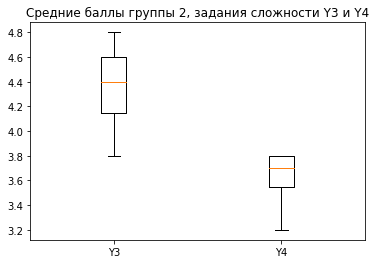

In [24]:
# Визуализируем
fig2, ax2 = plt.subplots()
ax2.set_title('Средние баллы группы 2, задания сложности Y3 и Y4')
ax2.boxplot([data_y3['mean_y3'],data_y4['mean_y4']],labels=['Y3','Y4'])
plt.show()

<AxesSubplot:title={'center':'Средние баллы группы 2, задания сложности Y3 и Y4'}>

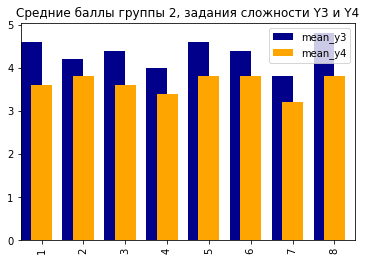

In [25]:
# Визуализируем
ax4 = data_y3['mean_y3'].plot(kind='bar', color='darkblue', y='mean_y3', position=1, legend=True)
data_y4['mean_y4'].plot(title='Средние баллы группы 2, задания сложности Y3 и Y4',kind='bar',position=0.5, color='orange', y='mean_y4', ax=ax4, legend=True)

In [26]:
#Разница
100-np.round(3.62*100/4.35,0)

17.0

In [27]:
data_y3.describe()

,z11_y3,z12_y3,z13_y3,z14_y3,z15_y3,sum_y3,mean_y3
count,8.000000,8.000000,8.000000,8.00000,8.000000,8.000000,8.000000
mean,4.875000,3.875000,4.500000,4.00000,4.500000,21.750000,4.350000
std,0.353553,0.834523,0.755929,0.92582,0.755929,1.669046,0.333809
min,4.000000,3.000000,3.000000,3.00000,3.000000,19.000000,3.800000
25%,5.000000,3.000000,4.000000,3.00000,4.000000,20.750000,4.150000
50%,5.000000,4.000000,5.000000,4.00000,5.000000,22.000000,4.400000
75%,5.000000,4.250000,5.000000,5.00000,5.000000,23.000000,4.600000
max,5.000000,5.000000,5.000000,5.00000,5.000000,24.000000,4.800000


In [28]:
data_y4.describe()

,z16_y4,z17_y4,z18_y4,z19_y4,z20_y4,sum_y4,mean_y4
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,4.250000,4.000000,3.000000,3.625000,3.250000,18.125000,3.625000
std,0.707107,1.069045,1.309307,0.517549,1.035098,1.125992,0.225198
min,3.000000,2.000000,1.000000,3.000000,2.000000,16.000000,3.200000
25%,4.000000,3.750000,2.000000,3.000000,2.750000,17.750000,3.550000
50%,4.000000,4.000000,3.000000,4.000000,3.000000,18.500000,3.700000
75%,5.000000,5.000000,4.000000,4.000000,4.000000,19.000000,3.800000
max,5.000000,5.000000,5.000000,4.000000,5.000000,19.000000,3.800000


In [29]:
###Гипотезы о влиянии сложности задания на качество восприятия информации
##Гипотеза о равенстве средних двух выборок
#Нулевая гипотеза: средний балл группы 2 за задание Y3 равен среднему баллу группы 2 за задание Y4 - сложность задания не влияет
#Альтернативная гипотеза: средний балл группы 2 за задание Y3 не равен среднему баллу группы 2 за задание Y4 - сложность задания влияет

#result = st.ttest_rel(data_y3['mean_y3'],data_y4['mean_y4'])
result = st.mannwhitneyu(data_y3['mean_y3'],data_y4['mean_y4'],alternative='two-sided')

print('alpha',alpha)

print('p-value:',result.pvalue)

if (result.pvalue < alpha):
    print("Отвергаем нулевую гипотезу, что сложность не влияет. Сложность задания влияет на качество восприятия информации")
else:
    print("Не получилось отвергнуть нулевую гипотезу, что сложность не влияет.")

alpha 0.01
p-value: 0.001622217638568673
Отвергаем нулевую гипотезу, что сложность не влияет. Сложность задания влияет на качество восприятия информации


# Выводы
**1. В предположении Y1 = Y2, влияет ли обучение на качество восприятия информации?**

Сформулировали нулевую гипотезу, что обучение не влияет на качество восприятия информации.

Сформулировали альтернативную гипотезу, что обучение влияет на качество восприятия информации.

Проверили гипотезы по Манну-Уитни (для t-критерия Стьюдента выборка слишком мала).

Задали alpha = 1%

Получили p-value = 5%

Вывод: Обучение не влияет на качество восприятия информации.




**2. В предположении Y3 < Y4, влияет ли сложность задания на качество восприятия информации?**

Сформулировали нулевую гипотезу, что сложность задания не влияет на качество восприятия информации.

Сформулировали альтернативную гипотезу, что сложность задания влияет на качество восприятия информации.

Проверили гипотезы по Манну-Уитни (для t-критерия Стьюдента выборка слишком мала).

Задали alpha = 1%

Получили p-value = 0%

Вывод: Сложность задания влияет на качество восприятия информации.




**3. Допустим, что по итогам анализа процедуры проведения теста выяснилось, что Y1 = Y3, Y2 = Y4, Y1 < Y2. Как можно (и можно ли вообще) использовать результаты второй группы (I-P) для корректировки результатов первой группы (A-J)? Обосновать метод корректировки и провести переоценку результатов первого теста.**

Коррекция была бы возможна, если бы у нас в обоих случаях была одна и та же группа, но поскольку группы разные, будет неправильно корректировать результаты первой группы исходя из результатов второй.